## 💹💲Moody's와 Morningstar 주가 1994-2024
무디스(1994~2023)와 모닝스타(2005~2024) 주가

In [1]:
#conda install statsmodels.tsa.seasonal

Channels:
 - conda-forge
 - nvidia
 - pytorch
Platform: linux-64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - statsmodels.tsa.seasonal

Current channels:

  - https://conda.anaconda.org/conda-forge
  - https://conda.anaconda.org/nvidia/linux-64
  - https://conda.anaconda.org/pytorch/linux-64
  - https://conda.anaconda.org/pytorch/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # 분해

In [3]:
d_parser = lambda x : pd.to_datetime(x, format='%Y %m %d')
df = pd.read_csv("/home/leejieun/workspace/kaggle-notebooks/datasets/kapturovalexander/moodys-share-prices-from-1994-till-april-2023/Moodys.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-11-01,8.312500,8.312500,8.187500,8.250000,6.565471,2176400
1,1994-11-02,8.250000,8.250000,8.187500,8.187500,6.515731,2348200
2,1994-11-03,8.187500,8.250000,8.125000,8.187500,6.515731,2060800
3,1994-11-04,8.187500,8.250000,8.125000,8.125000,6.465993,2663800
4,1994-11-07,8.062500,8.062500,8.000000,8.062500,6.416255,1049400
...,...,...,...,...,...,...,...
7155,2023-04-04,305.970001,310.290009,302.390015,303.940002,303.940002,743400
7156,2023-04-05,303.230011,304.040009,300.279999,302.850006,302.850006,584200
7157,2023-04-06,302.019989,302.839996,296.160004,298.619995,298.619995,564500
7158,2023-04-10,295.079987,296.769989,290.980011,295.660004,295.660004,492600


In [5]:
df.isna() # 값이 오류(#N/A) 인지 확인한다. 오류가 아닐 때 False

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7155,False,False,False,False,False,False,False
7156,False,False,False,False,False,False,False
7157,False,False,False,False,False,False,False
7158,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
df['Date'].min()

'1994-11-01'

In [13]:
df['Date'].max()

'2023-04-11'

In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,7.160000e+03
mean,81.428708,82.325171,80.543896,81.459335,76.262965,1.728320e+06
std,94.101423,95.075305,93.090423,94.096398,93.727654,1.826720e+06
min,6.937500,7.000000,6.875000,6.937500,5.520961,0.000000e+00
25%,17.923749,18.178750,17.625000,17.963750,14.478568,7.618000e+05
50%,38.615000,39.205000,38.094999,38.645001,32.791308,1.154750e+06
75%,100.977501,101.860001,100.139997,101.082500,94.003287,2.010800e+06
max,407.410004,407.940002,400.299988,406.690002,401.238342,4.354560e+07


In [16]:
mask = (df['Date']< '1995-03-03')
df[mask]

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-11-01,8.3125,8.3125,8.1875,8.2500,6.565471,2176400
1,1994-11-02,8.2500,8.2500,8.1875,8.1875,6.515731,2348200
2,1994-11-03,8.1875,8.2500,8.1250,8.1875,6.515731,2060800
3,1994-11-04,8.1875,8.2500,8.1250,8.1250,6.465993,2663800
4,1994-11-07,8.0625,8.0625,8.0000,8.0625,6.416255,1049400
...,...,...,...,...,...,...,...
79,1995-02-24,7.1875,7.2500,7.1875,7.2500,5.769656,1129800
80,1995-02-27,7.2500,7.2500,7.1875,7.2500,5.769656,910000
81,1995-02-28,7.2500,7.3125,7.1875,7.3125,5.819394,2920200
82,1995-03-01,7.3125,7.4375,7.3125,7.4375,5.918870,8590400


array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

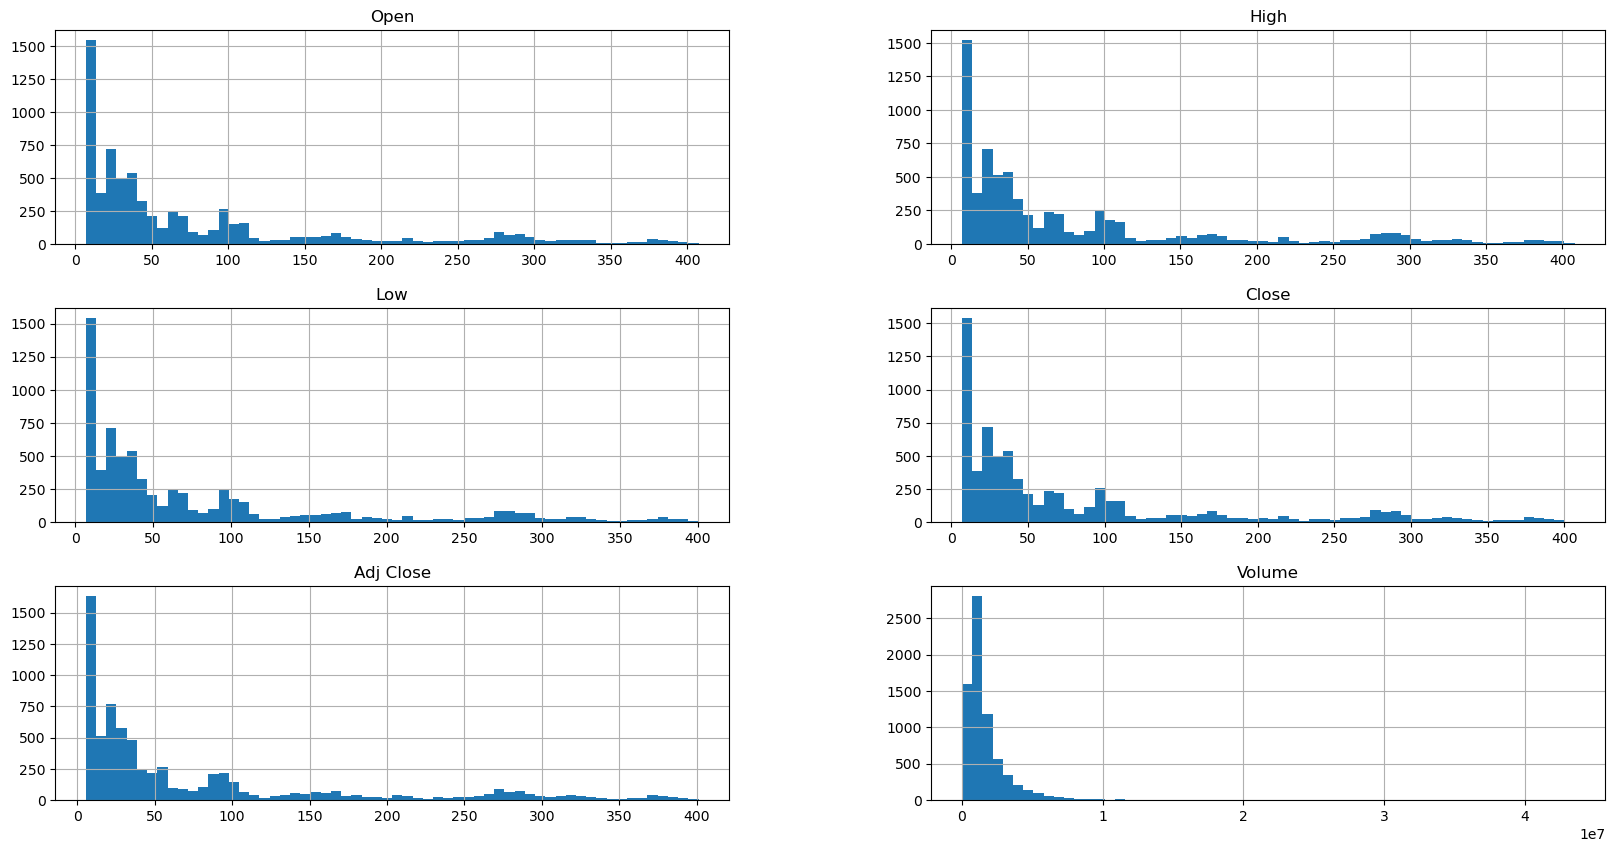

In [17]:
df.hist(bins=60, figsize=(20,10))

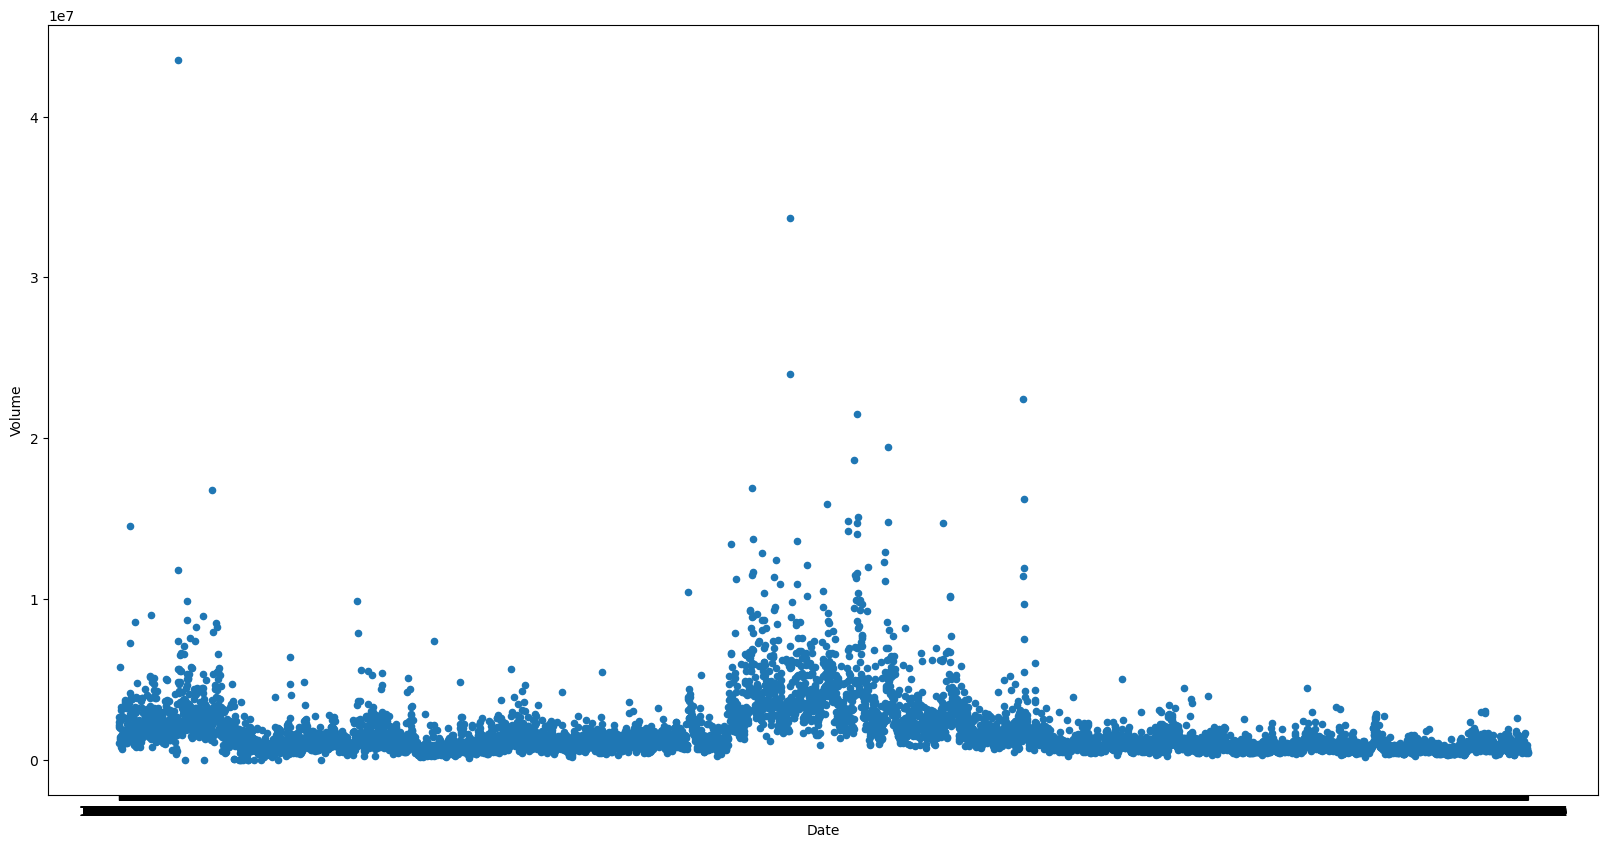

In [18]:
df.plot(kind='scatter', x='Date', y='Volume', figsize=(20, 10))
plt.show()

<Axes: >

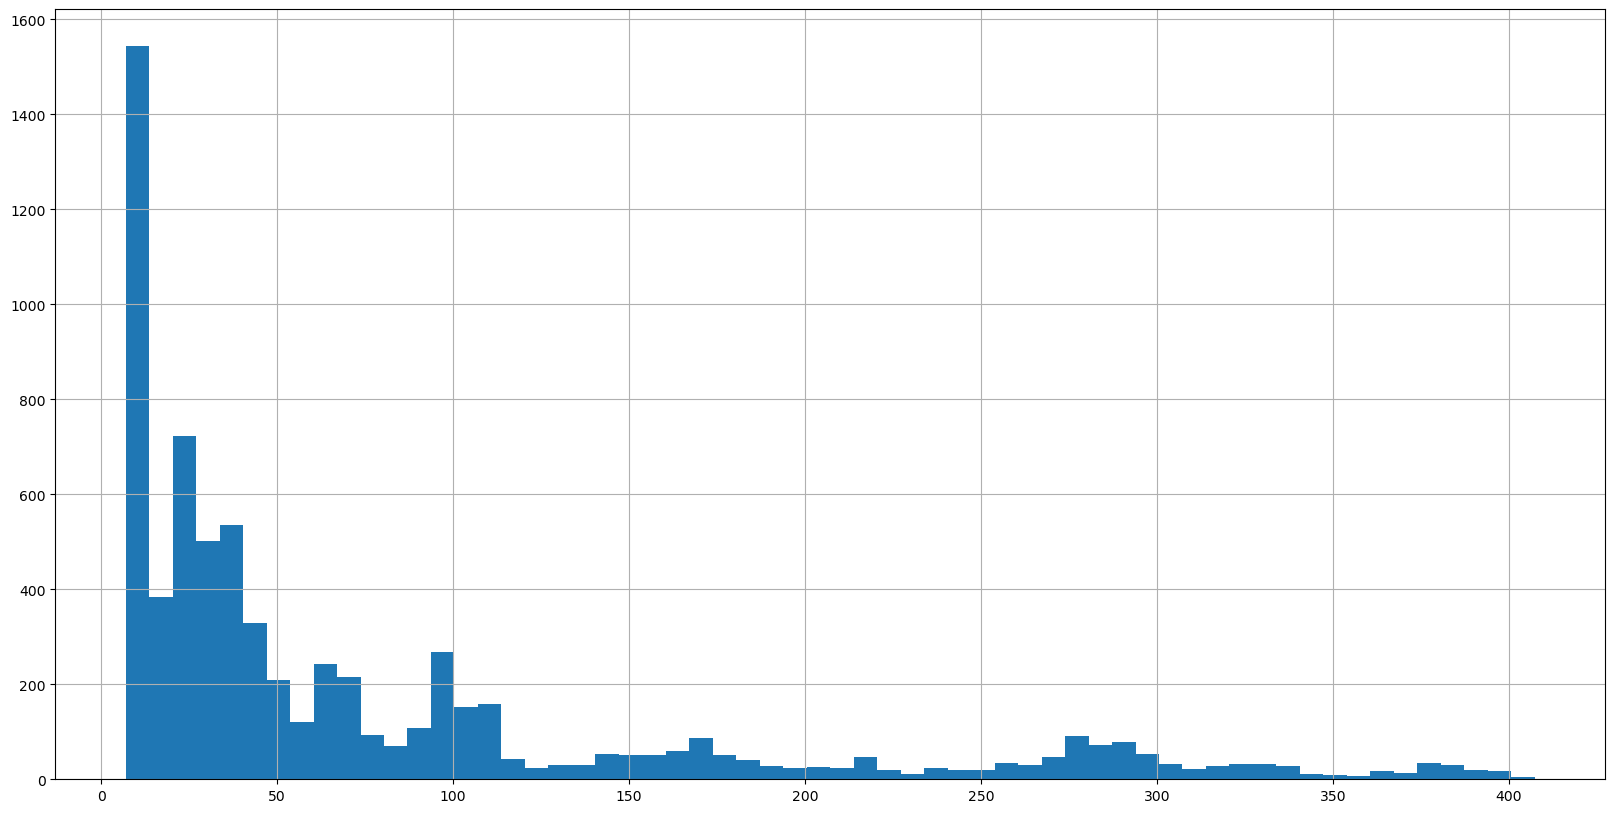

In [19]:
df['Open'].hist(bins=60 , figsize = (20,10))

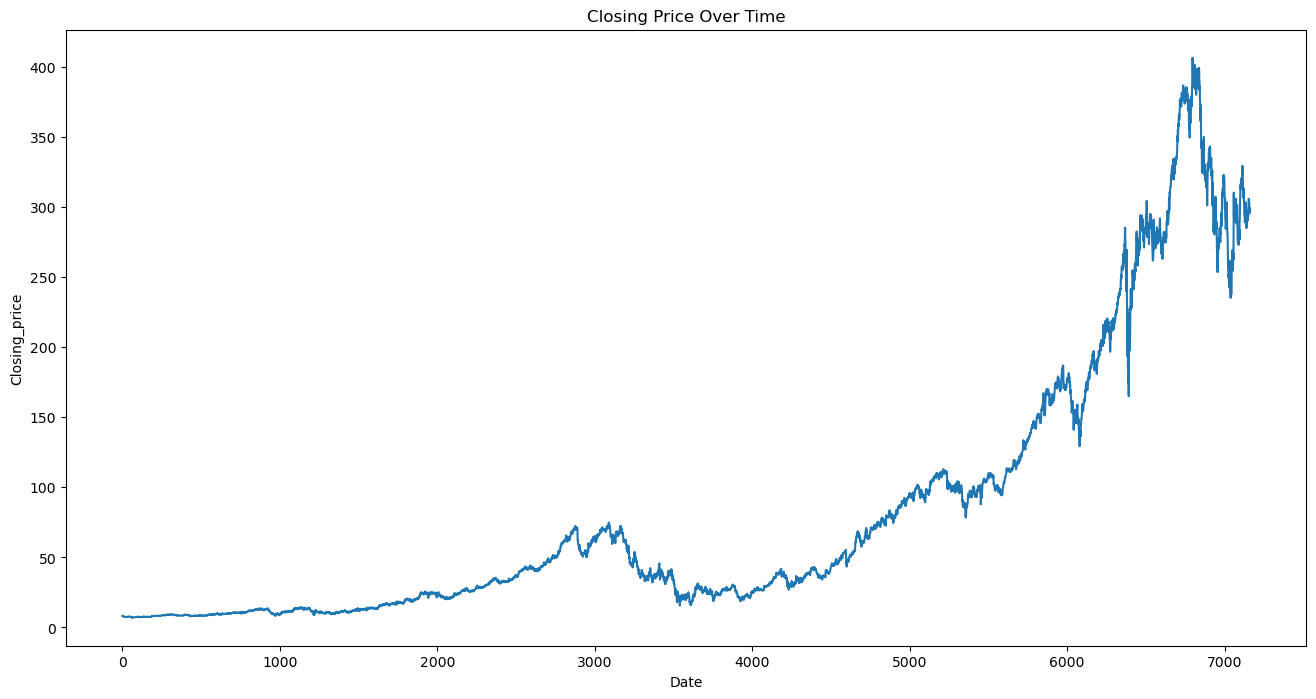

In [20]:
plt.figure(figsize=(16,8))
plt.title('Closing Price Over Time')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing_price')
plt.show()

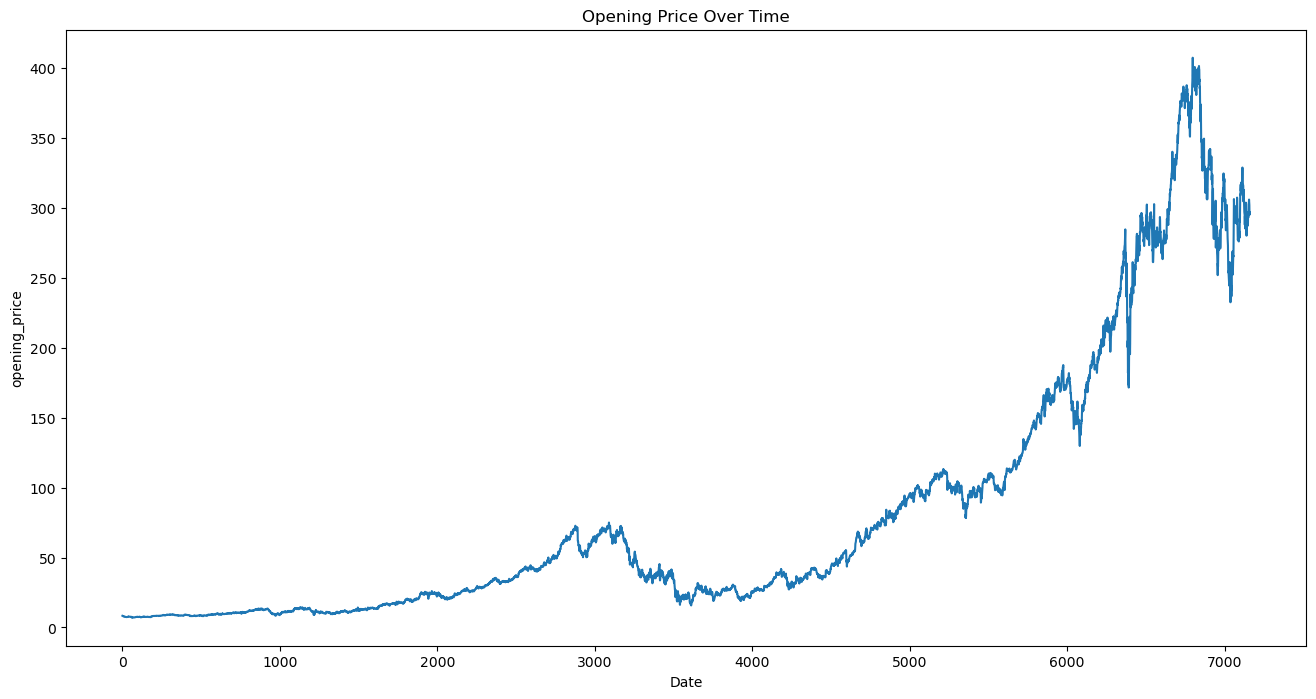

In [21]:
plt.figure(figsize=(16,8))
plt.title('Opening Price Over Time')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('opening_price')
plt.show()

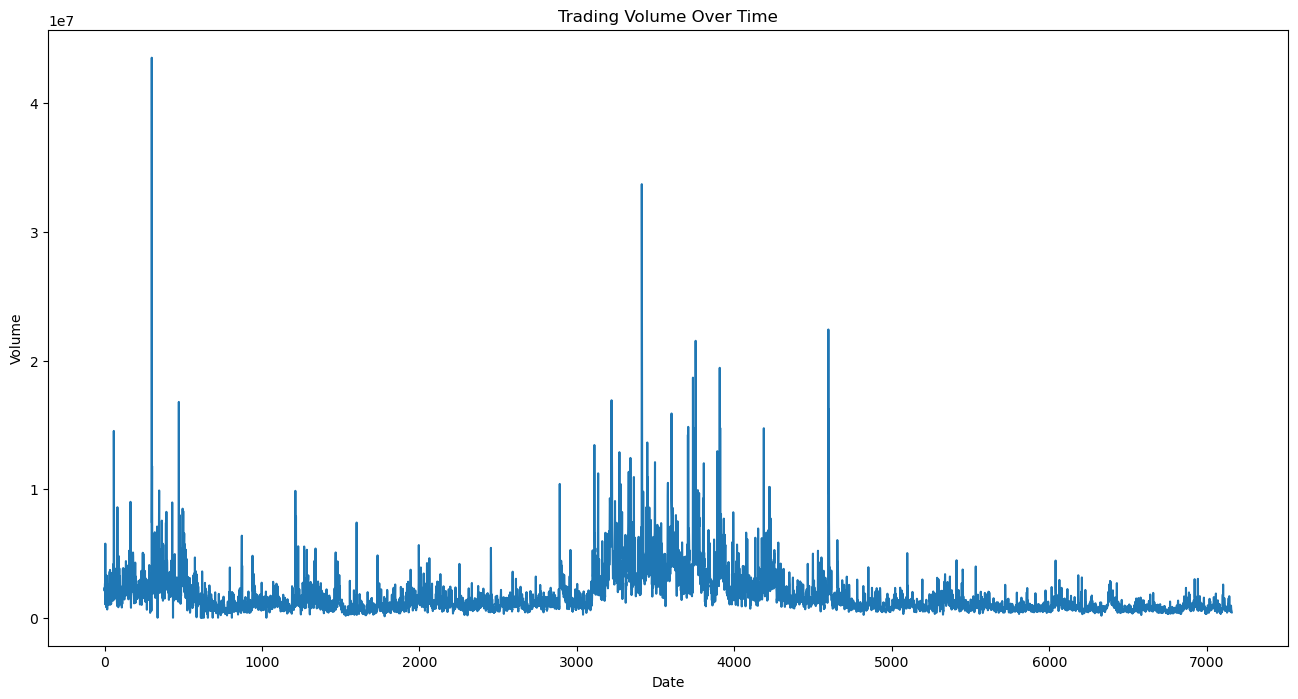

In [22]:
plt.figure(figsize=(16,8))
plt.title('Trading Volume Over Time')
plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [23]:
df['Daily_Return'] = df['Close'].pct_change()

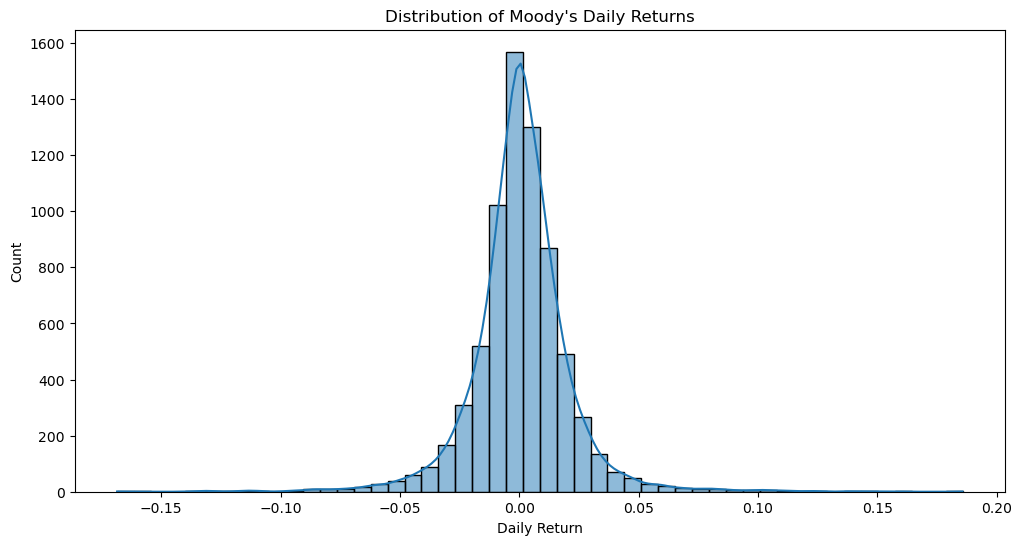

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily_Return'].dropna(), kde=True, bins=50)
plt.title('Distribution of Moody\'s Daily Returns')
plt.xlabel('Daily Return')
plt.show()

In [25]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

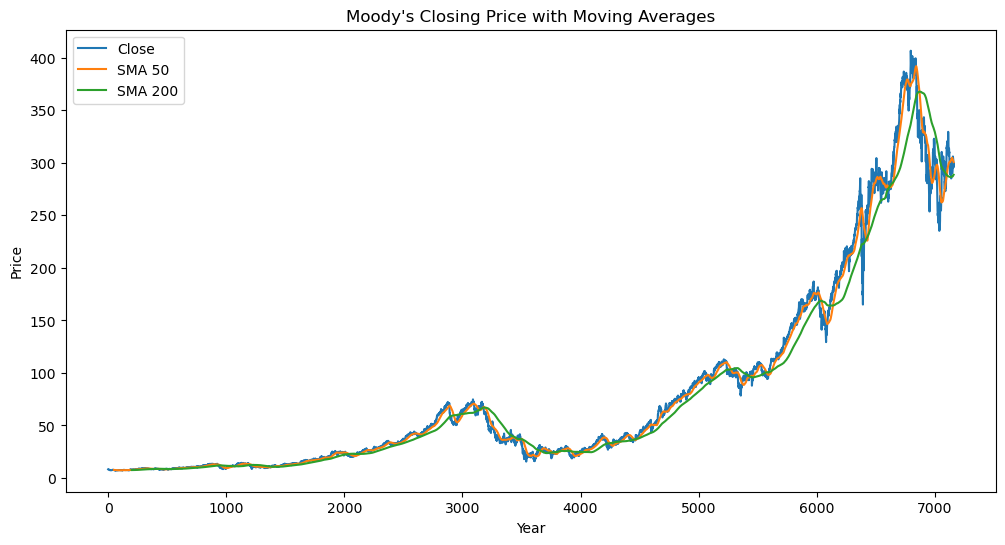

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['SMA_50'], label='SMA 50')
plt.plot(df['SMA_200'], label='SMA 200')
plt.title('Moody\'s Closing Price with Moving Averages')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Moody\'s Share Price - Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '1994-11-01'

In [28]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=252)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

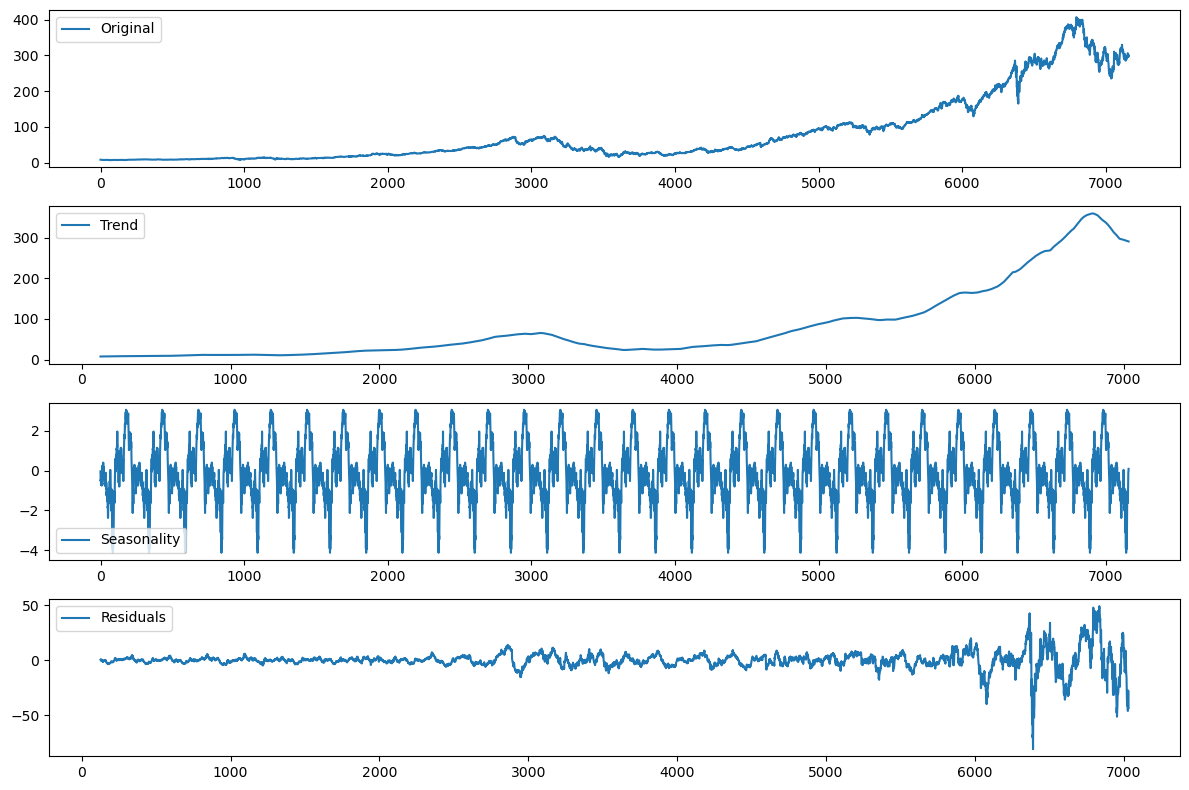

In [29]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()
plt.tight_layout()
plt.show()

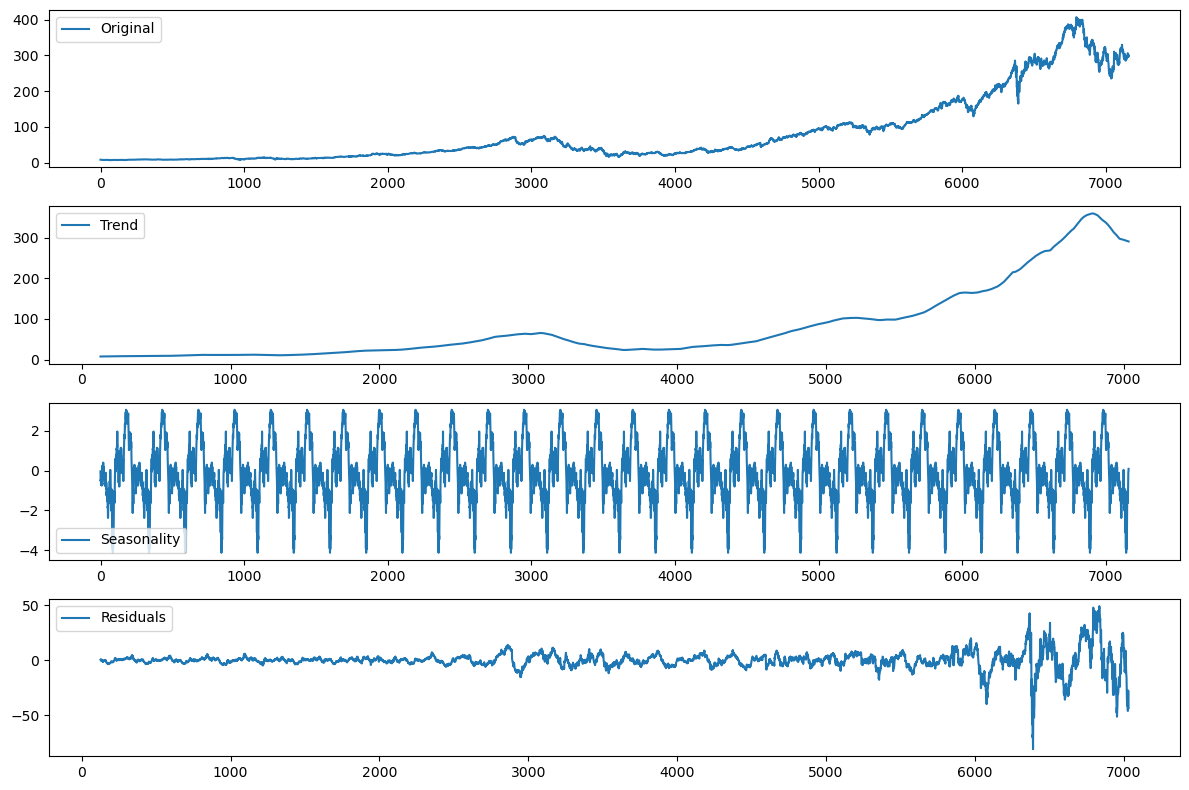

In [30]:
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
axes[0].plot(df['Close'], label='Original')
axes[1].plot(trend, label='Trend')
axes[2].plot(seasonal, label='Seasonality')
axes[3].plot(residual, label='Residuals')
for ax in axes:
    ax.legend()
plt.tight_layout()
plt.show()